Nagel-Schreckenberg model

Creating the road class and initialising with given cells all empty

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pprint import pprint

In [122]:
class Road:
    def __init__(self, name:str, number_of_cells: int = 10, number_of_cars: int = 3, max_speed: int = 4):
        self.name = name
        self.number_of_cells = number_of_cells
        self.max_speed = max_speed
        self.number_of_cars = number_of_cars

        if self.number_of_cars > self.number_of_cells:
            raise ValueError("Number of cars cannot exceed number of cells in the road.")

        if self.max_speed > self.number_of_cells:
            raise ValueError("Max speed cannot exceed number of cells in the road.")

        self.road_arr = np.ones((number_of_cells), dtype=int)
        self.road_arr= self.road_arr * (-1)  # Set all cells to empty (-1)

        self.car_pool={  }      
        
    
    def __str__(self):
        return f"Road {self.name} with {self.number_of_cells} cells, see the road array below:\n{self.road_arr}"
    

    def next_cell(self, current_pos: int = 1, speed_value: int=1) -> int:
        """
        Returns the next cell index in the road.
        """
        next_step = (current_pos + speed_value) % self.number_of_cells
        if next_step <= 0:
            next_step = 1
        return next_step   # % to ensure the car does not run out of the road
    
    def add_car(self):
        """
        Adds a car to the road.
        """
        car_position = np.random.choice(range(self.number_of_cells), size=self.number_of_cars, replace=False)
        #print(f"Car positions: {car_position}")
        colors = list(mcolors.TABLEAU_COLORS.values())

        for i in car_position:
            
            car_velocity = np.random.randint(1, self.max_speed)
            car_color = colors[i % len(colors)]
            total_step = 0
            self.car_pool[f'car_{chr(65+i)}'] = [ i, car_velocity, car_color, total_step]  # Assign a unique ID to each car]
            #print(f"Car {i} added at position {self.car_pool['car_'+str(i)][0]} with speed {self.car_pool['car_'+str(i)][1]}")  
            
            self.road_arr[i] = car_velocity
        
        print(f"Road array after adding cars -1 indicates empty cell, free space:\n{self.road_arr}")
        #print(f"Car pool after adding cars:\n{self.car_pool}")
        return self.road_arr, self.car_pool
        
class RoadSimulation:
    def __init__(self, road: Road):
        self.road = road
               
        
    def __str__(self): 
        return f"Road simulation for {self.road.name} with {self.road.number_of_cells} cells and {self.road.number_of_cars} cars."

    def run_simulation(self, number_of_iterations: int = 20,dwaddle_probability: float = 0.5):
        """
        Runs the simulation for a given number of time steps.
        """
        ordered_car_list = []
        speed_factor = 1  # Speed increment for each car
        #set all the total steps list value to the positions so we ensure no overtaking
        for car, _ in sorted(self.road.car_pool.items(), key=lambda item: item[1][0], reverse=True):
            self.road.car_pool[car][3] = self.road.car_pool[car][0]
            ordered_car_list.append(car)
        
        for itr in range(number_of_iterations):
            
            #each car moves 1 speed up 
            #accelerate by one speed unit if not at max velocity v_max
            
            n = 0  # to control the car at the end of the road
            prev_car = None  # Initialize the previous car position to the first car's position
            

            

            for car in ordered_car_list:
                
                if not prev_car:
                    prev_car = car
                
                

                current_car_postion = self.road.car_pool[car][0]
                #current_car_velocity = self.road.car_pool[car][1]
                print(f" iteration: {itr}, Car {car} is at position {current_car_postion} with speed {self.road.car_pool[car][1]}")
                # for each iteration, we activate dwaddle half way the iteration
                if itr > number_of_iterations // 2:
                    print(f"We are half way through , dwadding activated")
                    # dwaddle probability
                    if np.random.rand() < dwaddle_probability:
                        print(f"Car {car} is dwaddling")
                        # dwaddle by reducing speed by 1
                        speed_factor = -1
                    else:
                        print(f"Car {car} is not dwaddling, past the probability")
                        speed_factor = 1
                else:
                    print(f"dwaddle not activated, the speed of the car will increase by 1")
                    speed_factor = 1.

                
                current_car_speed = self.road.car_pool[car][1]  # Get the current position of the car
                #rule one, all cars accelerate by one speed unit if not at max velocity v_max
                self.road.car_pool[car][1] = min(max(self.road.car_pool[car][1] + speed_factor, 0), self.road.max_speed) #slow down to maximum velocity 
                
                print(f"Car {car} at position {current_car_postion} has a new speed {self.road.car_pool[car][1]} after previous speed {current_car_speed} and speed factor {speed_factor}")
                
                self.road.car_pool[car][3] += self.road.car_pool[car][1] #total travel step of the car
                
                print(f"Car {car} total travel step is {self.road.car_pool[car][3]} and the previous car travel step is {self.road.car_pool[prev_car][3]}")
                #change cars position
                self.road.car_pool[car][0] = self.road.next_cell(self.road.car_pool[car][0], self.road.car_pool[car][1]) #move the car to the next cell
                
                print(f"Car {car} new position is {self.road.car_pool[car][0]} after moving from {current_car_postion} to {self.road.car_pool[car][0]}")
                
                # Store the previous position of the car
                if n == 0: # for each iteration the first car has an n of 0, so we dont check if it speed will pass the other cars since 
                             # that other car is yet to move
                    print(f"Car {car} is the first car in the iteration, so we dont check if it will overtake the other cars")
                else:   # now we check if the car ahead will be over taken by the car behind
                    print(f"Car {car} is not the first car in the iteration, so we check if it will overtake the other cars")
                    
                    if self.road.car_pool[car][3] >= self.road.car_pool[prev_car][3]:  #so if the position of the current car in iteration will overtake or equal the car ahead
                                                                          #then we reduce their speed by getting the difference between the two cars
                        self.road.car_pool[car][0] = min((self.road.car_pool[prev_car][3] - 1),0) #slow down to maximum velocity
                        self.road.car_pool[car][1] -= 1 #reduce the speed of the car ahead
                        self.road.car_pool[car][3] -= 1 
                prev_car = car  #update the previous position of the car ahead
                
                n += 1  #to check that the first car has already moves

                #self.road.car_pool[car][0] = self.road.next_cell(self.road.car_pool[car][0], self.road.car_pool[car][1])

            pprint(f"car pool {self.road.car_pool}") 

             # Reshape the road array for visualization
            road_array = self.road.road_arr.reshape((1, -1))

            # Example of plotting a simple road
            plt.imshow(road_array, cmap='gray', interpolation='nearest')
            plt.title(f"iteration: {itr}, max Speead: {self.road.max_speed}")
            plt.colorbar(label='Cell Value')

            for car_id, (position, velocity, color, total_steps) in self.road.car_pool.items():
                #print(f"Car {car_id} is at position {position} with speed {velocity} and color {color}")
                plt.scatter(position, 0, color=color, label=car_id, s=100)  # Plot car as a colored dot
                plt.text(position, 0, str(velocity), color='white', ha='center', va='center')  # Add velocity as label

            plt.legend(loc='upper left', bbox_to_anchor=(0.5, -0.1), title="Cars")
            plt.show()  
            
    

Road array after adding cars -1 indicates empty cell, free space:
[-1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1]
 iteration: 0, Car car_[ is at position 26 with speed 2
dwaddle not activated, the speed of the car will increase by 1
Car car_[ at position 26 has a new speed 3.0 after previous speed 2 and speed factor 1.0
Car car_[ total travel step is 29.0 and the previous car travel step is 29.0
Car car_[ new position is 29.0 after moving from 26 to 29.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 0, Car car_L is at position 11 with speed 6
dwaddle not activated, the speed of the car will increase by 1
Car car_L at position 11 has a new speed 7.0 after previous speed 6 and speed factor 1.0
Car car_L total travel step is 18.0 and the previous car travel step is 29.0
Car car_L new position is 18.0 after moving from 11 to 18.0
Car car_L is not the first car in the i

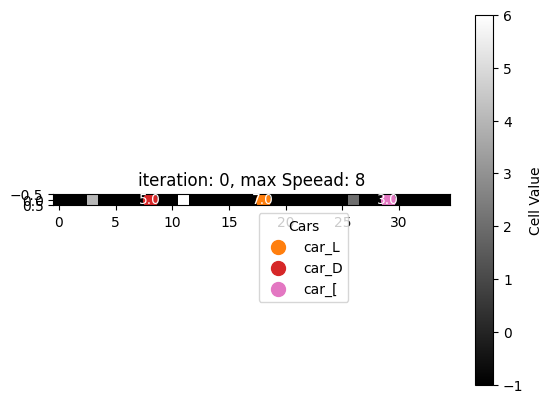

 iteration: 1, Car car_[ is at position 29.0 with speed 3.0
dwaddle not activated, the speed of the car will increase by 1
Car car_[ at position 29.0 has a new speed 4.0 after previous speed 3.0 and speed factor 1.0
Car car_[ total travel step is 33.0 and the previous car travel step is 33.0
Car car_[ new position is 33.0 after moving from 29.0 to 33.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 1, Car car_L is at position 18.0 with speed 7.0
dwaddle not activated, the speed of the car will increase by 1
Car car_L at position 18.0 has a new speed 8.0 after previous speed 7.0 and speed factor 1.0
Car car_L total travel step is 26.0 and the previous car travel step is 33.0
Car car_L new position is 26.0 after moving from 18.0 to 26.0
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 1, Car car_D is at position 8.0 with speed 5.0
dwaddle not activated, the speed of th

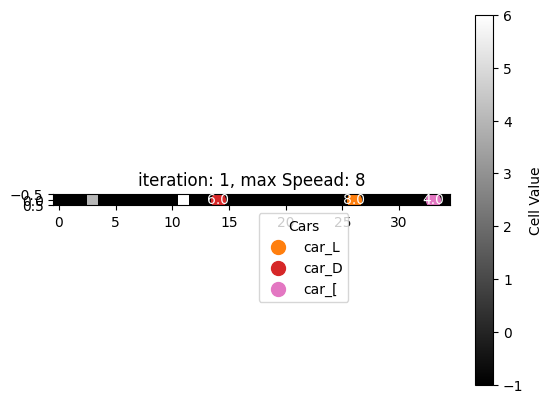

 iteration: 2, Car car_[ is at position 33.0 with speed 4.0
dwaddle not activated, the speed of the car will increase by 1
Car car_[ at position 33.0 has a new speed 5.0 after previous speed 4.0 and speed factor 1.0
Car car_[ total travel step is 38.0 and the previous car travel step is 38.0
Car car_[ new position is 3.0 after moving from 33.0 to 3.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 2, Car car_L is at position 26.0 with speed 8.0
dwaddle not activated, the speed of the car will increase by 1
Car car_L at position 26.0 has a new speed 8 after previous speed 8.0 and speed factor 1.0
Car car_L total travel step is 34.0 and the previous car travel step is 38.0
Car car_L new position is 34.0 after moving from 26.0 to 34.0
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 2, Car car_D is at position 14.0 with speed 6.0
dwaddle not activated, the speed of the c

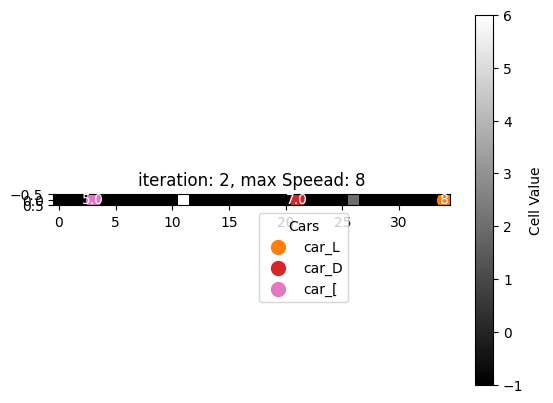

 iteration: 3, Car car_[ is at position 3.0 with speed 5.0
dwaddle not activated, the speed of the car will increase by 1
Car car_[ at position 3.0 has a new speed 6.0 after previous speed 5.0 and speed factor 1.0
Car car_[ total travel step is 44.0 and the previous car travel step is 44.0
Car car_[ new position is 9.0 after moving from 3.0 to 9.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 3, Car car_L is at position 34.0 with speed 8
dwaddle not activated, the speed of the car will increase by 1
Car car_L at position 34.0 has a new speed 8 after previous speed 8 and speed factor 1.0
Car car_L total travel step is 42.0 and the previous car travel step is 44.0
Car car_L new position is 7.0 after moving from 34.0 to 7.0
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 3, Car car_D is at position 21.0 with speed 7.0
dwaddle not activated, the speed of the car will i

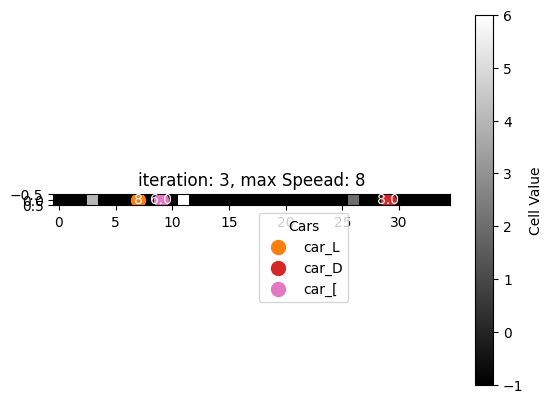

 iteration: 4, Car car_[ is at position 9.0 with speed 6.0
dwaddle not activated, the speed of the car will increase by 1
Car car_[ at position 9.0 has a new speed 7.0 after previous speed 6.0 and speed factor 1.0
Car car_[ total travel step is 51.0 and the previous car travel step is 51.0
Car car_[ new position is 16.0 after moving from 9.0 to 16.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 4, Car car_L is at position 7.0 with speed 8
dwaddle not activated, the speed of the car will increase by 1
Car car_L at position 7.0 has a new speed 8 after previous speed 8 and speed factor 1.0
Car car_L total travel step is 50.0 and the previous car travel step is 51.0
Car car_L new position is 15.0 after moving from 7.0 to 15.0
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 4, Car car_D is at position 29.0 with speed 8.0
dwaddle not activated, the speed of the car will 

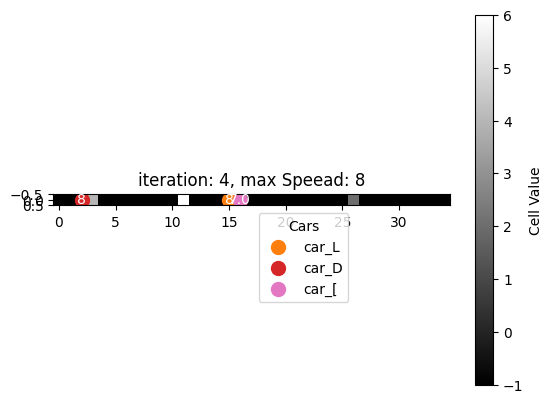

 iteration: 5, Car car_[ is at position 16.0 with speed 7.0
dwaddle not activated, the speed of the car will increase by 1
Car car_[ at position 16.0 has a new speed 8.0 after previous speed 7.0 and speed factor 1.0
Car car_[ total travel step is 59.0 and the previous car travel step is 59.0
Car car_[ new position is 24.0 after moving from 16.0 to 24.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 5, Car car_L is at position 15.0 with speed 8
dwaddle not activated, the speed of the car will increase by 1
Car car_L at position 15.0 has a new speed 8 after previous speed 8 and speed factor 1.0
Car car_L total travel step is 58.0 and the previous car travel step is 59.0
Car car_L new position is 23.0 after moving from 15.0 to 23.0
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 5, Car car_D is at position 2.0 with speed 8
dwaddle not activated, the speed of the car wi

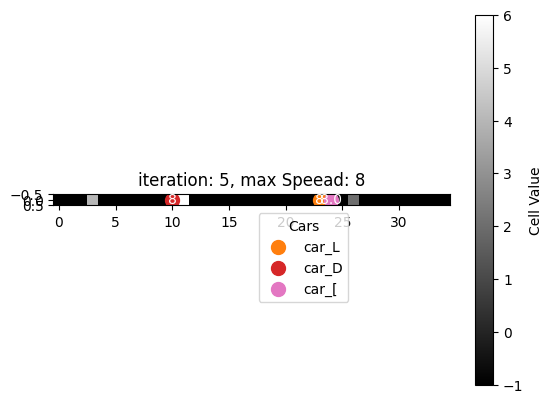

 iteration: 6, Car car_[ is at position 24.0 with speed 8.0
dwaddle not activated, the speed of the car will increase by 1
Car car_[ at position 24.0 has a new speed 8 after previous speed 8.0 and speed factor 1.0
Car car_[ total travel step is 67.0 and the previous car travel step is 67.0
Car car_[ new position is 32.0 after moving from 24.0 to 32.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 6, Car car_L is at position 23.0 with speed 8
dwaddle not activated, the speed of the car will increase by 1
Car car_L at position 23.0 has a new speed 8 after previous speed 8 and speed factor 1.0
Car car_L total travel step is 66.0 and the previous car travel step is 67.0
Car car_L new position is 31.0 after moving from 23.0 to 31.0
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 6, Car car_D is at position 10.0 with speed 8
dwaddle not activated, the speed of the car wil

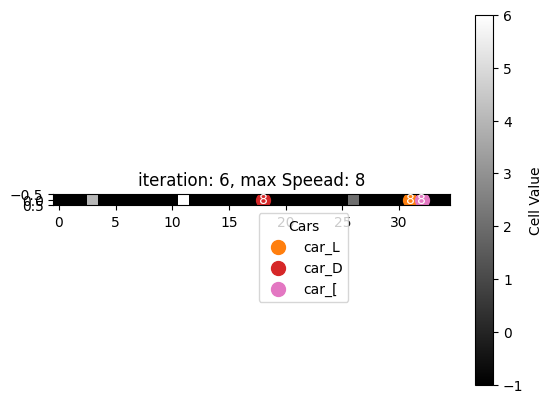

 iteration: 7, Car car_[ is at position 32.0 with speed 8
dwaddle not activated, the speed of the car will increase by 1
Car car_[ at position 32.0 has a new speed 8 after previous speed 8 and speed factor 1.0
Car car_[ total travel step is 75.0 and the previous car travel step is 75.0
Car car_[ new position is 5.0 after moving from 32.0 to 5.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 7, Car car_L is at position 31.0 with speed 8
dwaddle not activated, the speed of the car will increase by 1
Car car_L at position 31.0 has a new speed 8 after previous speed 8 and speed factor 1.0
Car car_L total travel step is 74.0 and the previous car travel step is 75.0
Car car_L new position is 4.0 after moving from 31.0 to 4.0
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 7, Car car_D is at position 18.0 with speed 8
dwaddle not activated, the speed of the car will increa

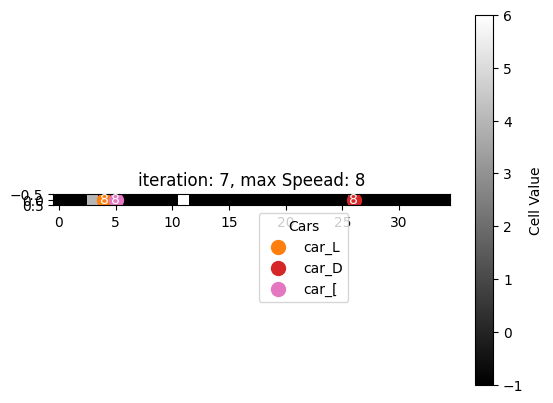

 iteration: 8, Car car_[ is at position 5.0 with speed 8
dwaddle not activated, the speed of the car will increase by 1
Car car_[ at position 5.0 has a new speed 8 after previous speed 8 and speed factor 1.0
Car car_[ total travel step is 83.0 and the previous car travel step is 83.0
Car car_[ new position is 13.0 after moving from 5.0 to 13.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 8, Car car_L is at position 4.0 with speed 8
dwaddle not activated, the speed of the car will increase by 1
Car car_L at position 4.0 has a new speed 8 after previous speed 8 and speed factor 1.0
Car car_L total travel step is 82.0 and the previous car travel step is 83.0
Car car_L new position is 12.0 after moving from 4.0 to 12.0
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 8, Car car_D is at position 26.0 with speed 8
dwaddle not activated, the speed of the car will increase

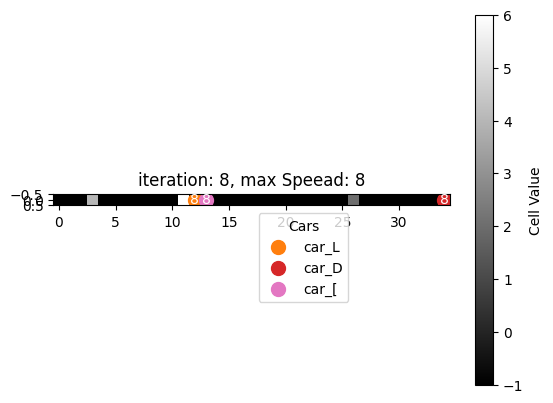

 iteration: 9, Car car_[ is at position 13.0 with speed 8
dwaddle not activated, the speed of the car will increase by 1
Car car_[ at position 13.0 has a new speed 8 after previous speed 8 and speed factor 1.0
Car car_[ total travel step is 91.0 and the previous car travel step is 91.0
Car car_[ new position is 21.0 after moving from 13.0 to 21.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 9, Car car_L is at position 12.0 with speed 8
dwaddle not activated, the speed of the car will increase by 1
Car car_L at position 12.0 has a new speed 8 after previous speed 8 and speed factor 1.0
Car car_L total travel step is 90.0 and the previous car travel step is 91.0
Car car_L new position is 20.0 after moving from 12.0 to 20.0
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 9, Car car_D is at position 34.0 with speed 8
dwaddle not activated, the speed of the car will in

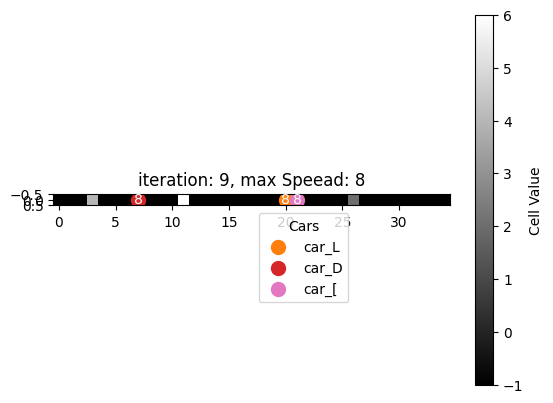

 iteration: 10, Car car_[ is at position 21.0 with speed 8
dwaddle not activated, the speed of the car will increase by 1
Car car_[ at position 21.0 has a new speed 8 after previous speed 8 and speed factor 1.0
Car car_[ total travel step is 99.0 and the previous car travel step is 99.0
Car car_[ new position is 29.0 after moving from 21.0 to 29.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 10, Car car_L is at position 20.0 with speed 8
dwaddle not activated, the speed of the car will increase by 1
Car car_L at position 20.0 has a new speed 8 after previous speed 8 and speed factor 1.0
Car car_L total travel step is 98.0 and the previous car travel step is 99.0
Car car_L new position is 28.0 after moving from 20.0 to 28.0
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 10, Car car_D is at position 7.0 with speed 8
dwaddle not activated, the speed of the car will 

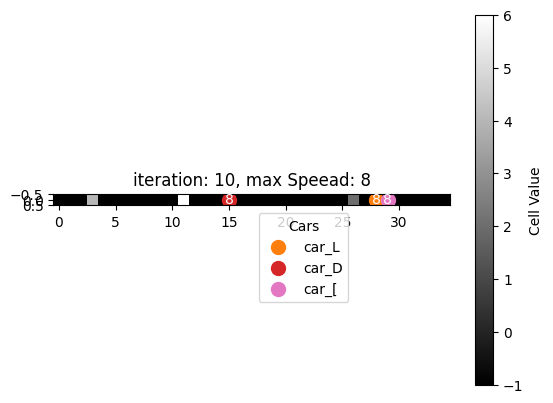

 iteration: 11, Car car_[ is at position 29.0 with speed 8
We are half way through , dwadding activated
Car car_[ is dwaddling
Car car_[ at position 29.0 has a new speed 7 after previous speed 8 and speed factor -1
Car car_[ total travel step is 106.0 and the previous car travel step is 106.0
Car car_[ new position is 1.0 after moving from 29.0 to 1.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 11, Car car_L is at position 28.0 with speed 8
We are half way through , dwadding activated
Car car_L is dwaddling
Car car_L at position 28.0 has a new speed 7 after previous speed 8 and speed factor -1
Car car_L total travel step is 105.0 and the previous car travel step is 106.0
Car car_L new position is 1 after moving from 28.0 to 1
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 11, Car car_D is at position 15.0 with speed 8
We are half way through , dwadding activated

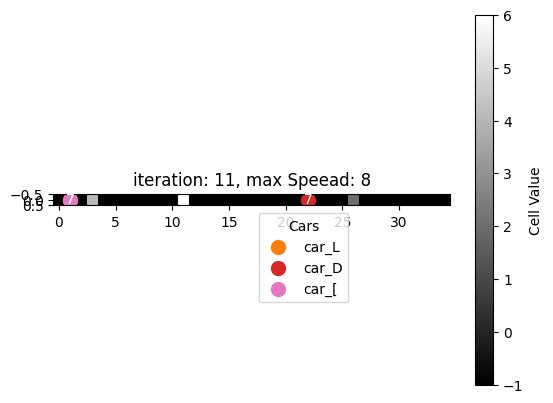

 iteration: 12, Car car_[ is at position 1.0 with speed 7
We are half way through , dwadding activated
Car car_[ is dwaddling
Car car_[ at position 1.0 has a new speed 6 after previous speed 7 and speed factor -1
Car car_[ total travel step is 112.0 and the previous car travel step is 112.0
Car car_[ new position is 7.0 after moving from 1.0 to 7.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 12, Car car_L is at position 1 with speed 7
We are half way through , dwadding activated
Car car_L is not dwaddling, past the probability
Car car_L at position 1 has a new speed 8 after previous speed 7 and speed factor 1
Car car_L total travel step is 113.0 and the previous car travel step is 112.0
Car car_L new position is 9 after moving from 1 to 9
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 12, Car car_D is at position 22.0 with speed 7
We are half way through , dwadd

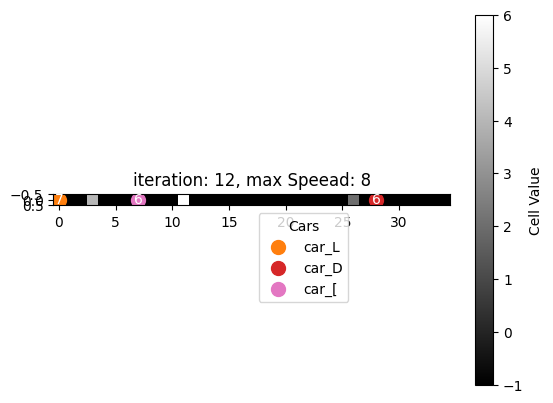

 iteration: 13, Car car_[ is at position 7.0 with speed 6
We are half way through , dwadding activated
Car car_[ is not dwaddling, past the probability
Car car_[ at position 7.0 has a new speed 7 after previous speed 6 and speed factor 1
Car car_[ total travel step is 119.0 and the previous car travel step is 119.0
Car car_[ new position is 14.0 after moving from 7.0 to 14.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 13, Car car_L is at position 0 with speed 7
We are half way through , dwadding activated
Car car_L is dwaddling
Car car_L at position 0 has a new speed 6 after previous speed 7 and speed factor -1
Car car_L total travel step is 118.0 and the previous car travel step is 119.0
Car car_L new position is 6 after moving from 0 to 6
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 13, Car car_D is at position 28.0 with speed 6
We are half way through , dwa

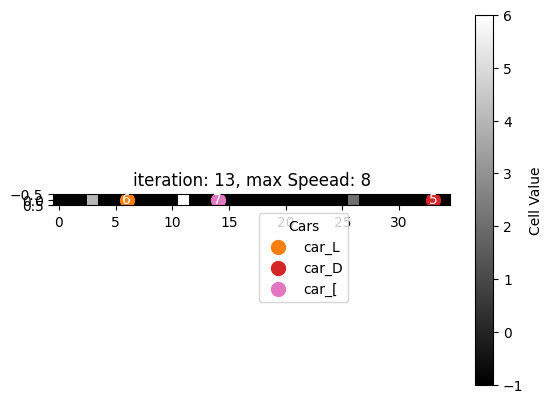

 iteration: 14, Car car_[ is at position 14.0 with speed 7
We are half way through , dwadding activated
Car car_[ is dwaddling
Car car_[ at position 14.0 has a new speed 6 after previous speed 7 and speed factor -1
Car car_[ total travel step is 125.0 and the previous car travel step is 125.0
Car car_[ new position is 20.0 after moving from 14.0 to 20.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 14, Car car_L is at position 6 with speed 6
We are half way through , dwadding activated
Car car_L is dwaddling
Car car_L at position 6 has a new speed 5 after previous speed 6 and speed factor -1
Car car_L total travel step is 123.0 and the previous car travel step is 125.0
Car car_L new position is 11 after moving from 6 to 11
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 14, Car car_D is at position 33.0 with speed 5
We are half way through , dwadding activated
Car 

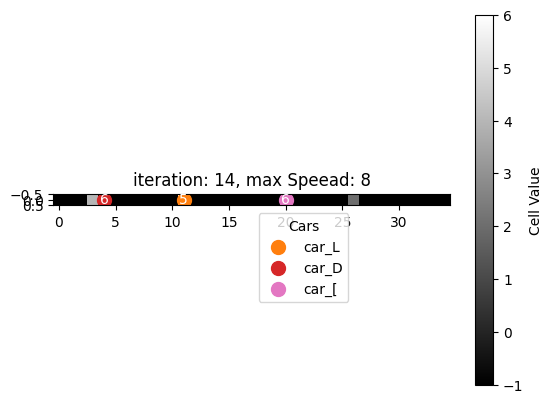

 iteration: 15, Car car_[ is at position 20.0 with speed 6
We are half way through , dwadding activated
Car car_[ is dwaddling
Car car_[ at position 20.0 has a new speed 5 after previous speed 6 and speed factor -1
Car car_[ total travel step is 130.0 and the previous car travel step is 130.0
Car car_[ new position is 25.0 after moving from 20.0 to 25.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 15, Car car_L is at position 11 with speed 5
We are half way through , dwadding activated
Car car_L is not dwaddling, past the probability
Car car_L at position 11 has a new speed 6 after previous speed 5 and speed factor 1
Car car_L total travel step is 129.0 and the previous car travel step is 130.0
Car car_L new position is 17 after moving from 11 to 17
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 15, Car car_D is at position 4.0 with speed 6
We are half way throug

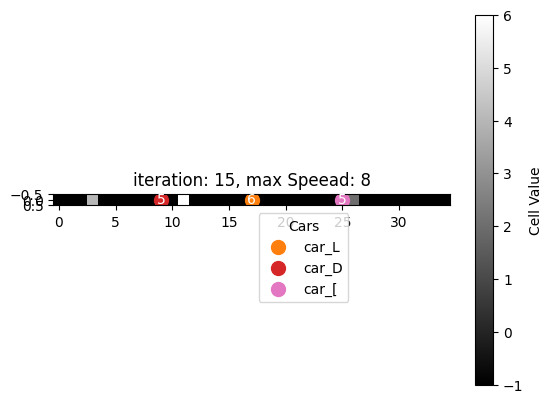

 iteration: 16, Car car_[ is at position 25.0 with speed 5
We are half way through , dwadding activated
Car car_[ is not dwaddling, past the probability
Car car_[ at position 25.0 has a new speed 6 after previous speed 5 and speed factor 1
Car car_[ total travel step is 136.0 and the previous car travel step is 136.0
Car car_[ new position is 31.0 after moving from 25.0 to 31.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 16, Car car_L is at position 17 with speed 6
We are half way through , dwadding activated
Car car_L is dwaddling
Car car_L at position 17 has a new speed 5 after previous speed 6 and speed factor -1
Car car_L total travel step is 134.0 and the previous car travel step is 136.0
Car car_L new position is 22 after moving from 17 to 22
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 16, Car car_D is at position 9.0 with speed 5
We are half way throug

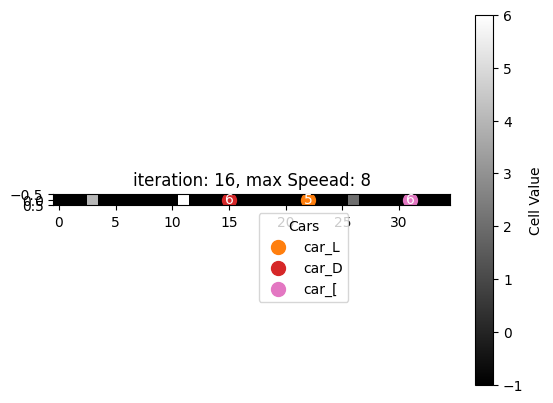

 iteration: 17, Car car_[ is at position 31.0 with speed 6
We are half way through , dwadding activated
Car car_[ is not dwaddling, past the probability
Car car_[ at position 31.0 has a new speed 7 after previous speed 6 and speed factor 1
Car car_[ total travel step is 143.0 and the previous car travel step is 143.0
Car car_[ new position is 3.0 after moving from 31.0 to 3.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 17, Car car_L is at position 22 with speed 5
We are half way through , dwadding activated
Car car_L is dwaddling
Car car_L at position 22 has a new speed 4 after previous speed 5 and speed factor -1
Car car_L total travel step is 138.0 and the previous car travel step is 143.0
Car car_L new position is 26 after moving from 22 to 26
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 17, Car car_D is at position 15.0 with speed 6
We are half way through

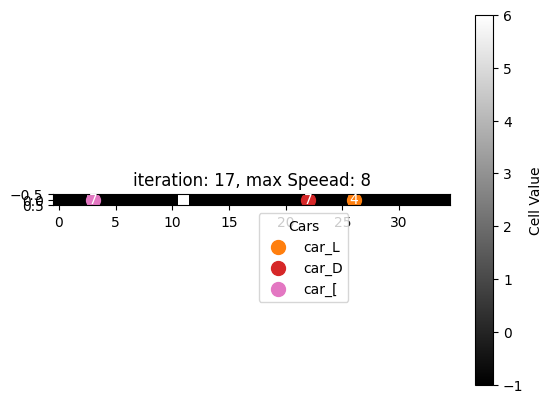

 iteration: 18, Car car_[ is at position 3.0 with speed 7
We are half way through , dwadding activated
Car car_[ is not dwaddling, past the probability
Car car_[ at position 3.0 has a new speed 8 after previous speed 7 and speed factor 1
Car car_[ total travel step is 151.0 and the previous car travel step is 151.0
Car car_[ new position is 11.0 after moving from 3.0 to 11.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 18, Car car_L is at position 26 with speed 4
We are half way through , dwadding activated
Car car_L is dwaddling
Car car_L at position 26 has a new speed 3 after previous speed 4 and speed factor -1
Car car_L total travel step is 141.0 and the previous car travel step is 151.0
Car car_L new position is 29 after moving from 26 to 29
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 18, Car car_D is at position 22.0 with speed 7
We are half way through 

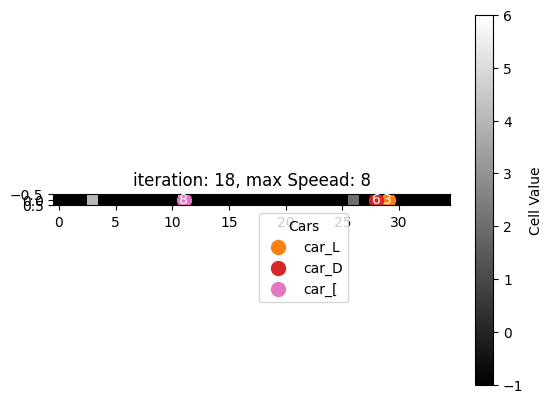

 iteration: 19, Car car_[ is at position 11.0 with speed 8
We are half way through , dwadding activated
Car car_[ is not dwaddling, past the probability
Car car_[ at position 11.0 has a new speed 8 after previous speed 8 and speed factor 1
Car car_[ total travel step is 159.0 and the previous car travel step is 159.0
Car car_[ new position is 19.0 after moving from 11.0 to 19.0
Car car_[ is the first car in the iteration, so we dont check if it will overtake the other cars
 iteration: 19, Car car_L is at position 29 with speed 3
We are half way through , dwadding activated
Car car_L is dwaddling
Car car_L at position 29 has a new speed 2 after previous speed 3 and speed factor -1
Car car_L total travel step is 143.0 and the previous car travel step is 159.0
Car car_L new position is 31 after moving from 29 to 31
Car car_L is not the first car in the iteration, so we check if it will overtake the other cars
 iteration: 19, Car car_D is at position 28.0 with speed 6
We are half way throu

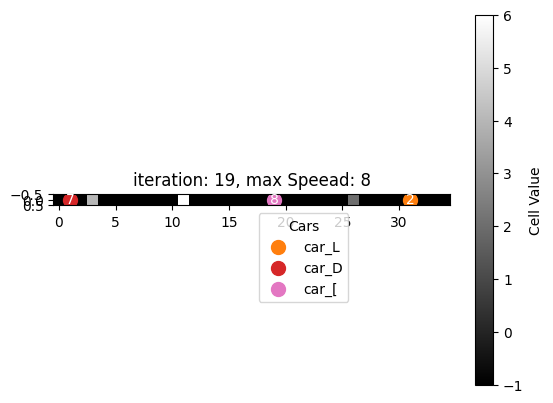

In [125]:
if __name__ == "__main__":
    road = Road("Main Street",  number_of_cells =35, number_of_cars=3, max_speed=8)
    updated_road, cars = road.add_car()
   

    road_simulation = RoadSimulation(road)
    road_simulation.run_simulation(number_of_iterations=20, dwaddle_probability=0.5)
    
   